In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

In [2]:
funda_data = pd.read_csv('Fundamental_data.csv')
flow_data = funda_data.loc[:,['public_date','pcf','PEG_trailing','TICKER']]
funda_data = funda_data.drop(columns=['qdate',"pcf",'staff_sale','PEG_trailing','gvkey','permno','adate'])
funda_data = funda_data.drop_duplicates()
stock_list = ['AAPL','AMZN','BRK-B','GOOG','JNJ','META','MSFT','NVDA','TSLA','V']

In [3]:
def merge_left(funda_stock,name,flow_data,freq):
    price = pd.read_csv('../stock_price/'+freq+'/'+name+'.csv')
    price['Date'] = price.Date.apply(lambda x: dt.datetime.strptime(x,'%Y-%m-%d'))
    close = price.loc[:,['Date']]
    funda_stock = pd.merge(flow_data,funda_stock,how='outer',on = ['public_date'])
    df = pd.merge(funda_stock,close,how='right',left_on=['public_date'],right_on=['Date'])
# Here we merge the dataset together using the forward filling method, which is using the old time data to fill the later time.
    df.set_index('Date',inplace=True)
    df.drop(columns=['TICKER_x','TICKER_y','public_date'],inplace=True)
    df.fillna(method='ffill',inplace=True)
    df.dropna(how ='all',inplace=True)
    df.to_csv('ForwardFundaIndicators/'+freq+'/'+name+'.csv')

In [5]:
for name in pd.unique(funda_data.TICKER).tolist():
    funda_stock = funda_data.loc[funda_data.TICKER==name,:]
    funda_stock['public_date'] = funda_data.public_date.apply(lambda x:dt.datetime.strptime(x,'%m/%d/%Y'))
    flow_stock = flow_data.loc[flow_data.TICKER==name,:]
    flow_stock['public_date'] = flow_stock.public_date.apply(lambda x:dt.datetime.strptime(x,'%m/%d/%Y'))
    if name == 'FB':
        name = 'META'
    elif name == 'BRK':
        name = 'BRK-B'
    elif name == 'GOOGL':
        name = 'GOOG'
    merge_left(funda_stock,name,flow_stock,'Daily')
    merge_left(funda_stock,name,flow_stock,'Weekly')
    merge_left(funda_stock,name,flow_stock,'Monthly')

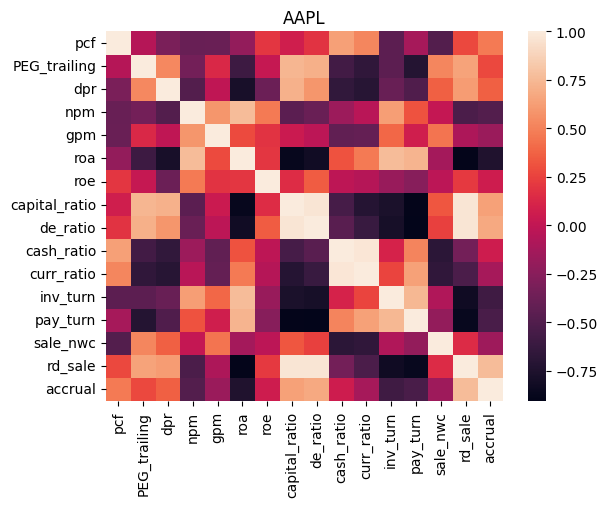

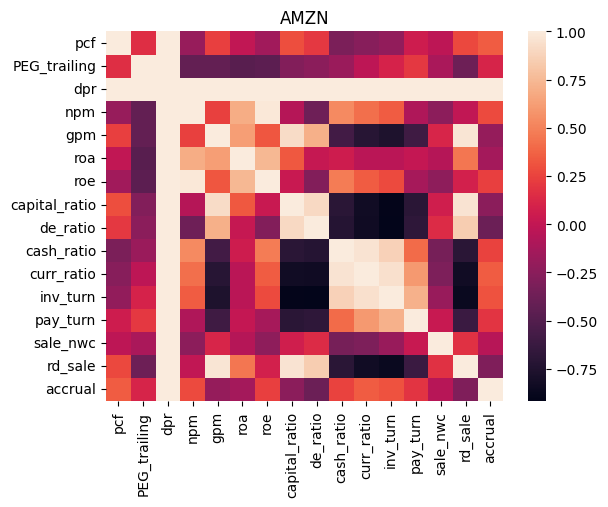

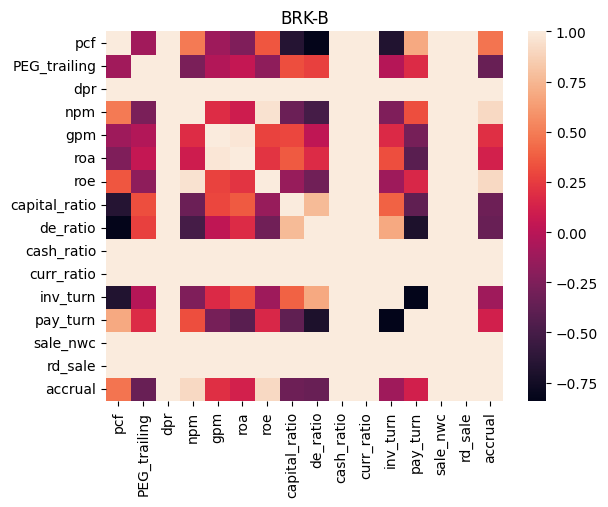

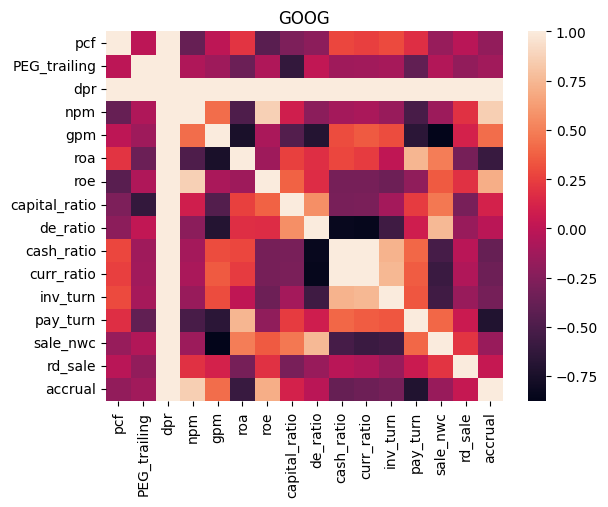

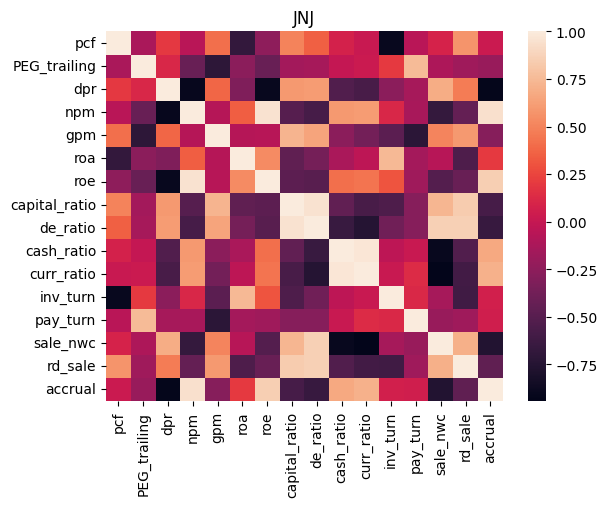

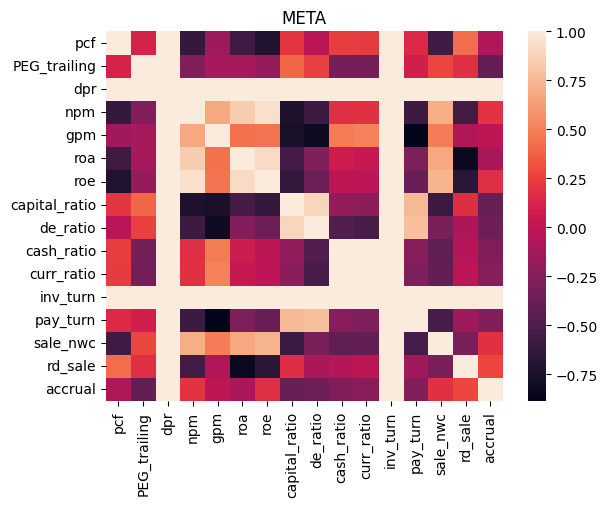

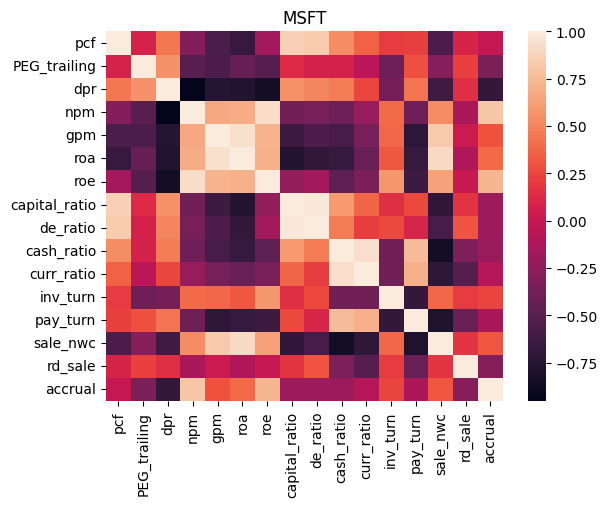

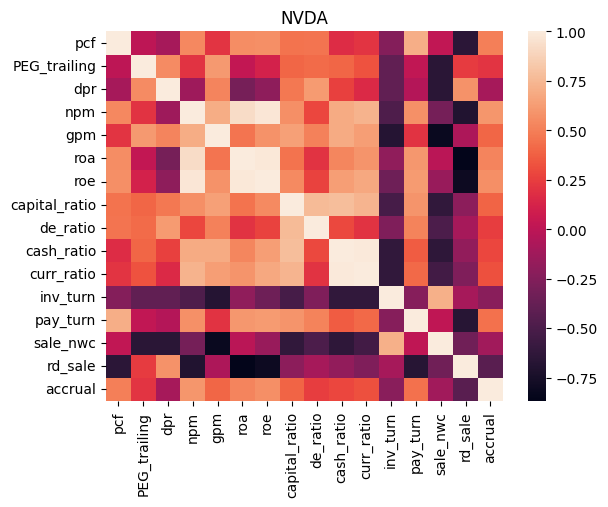

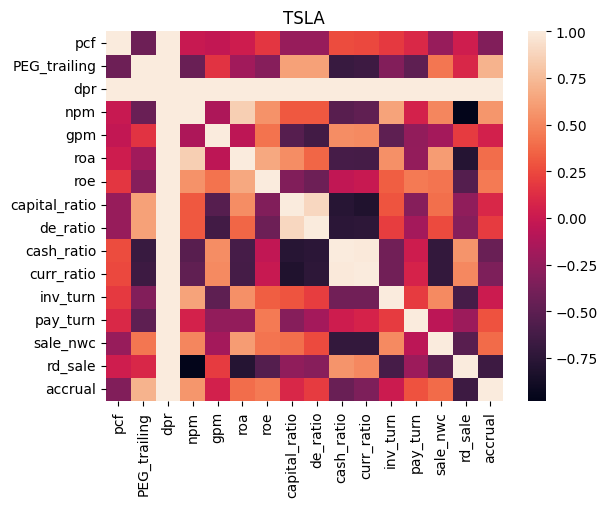

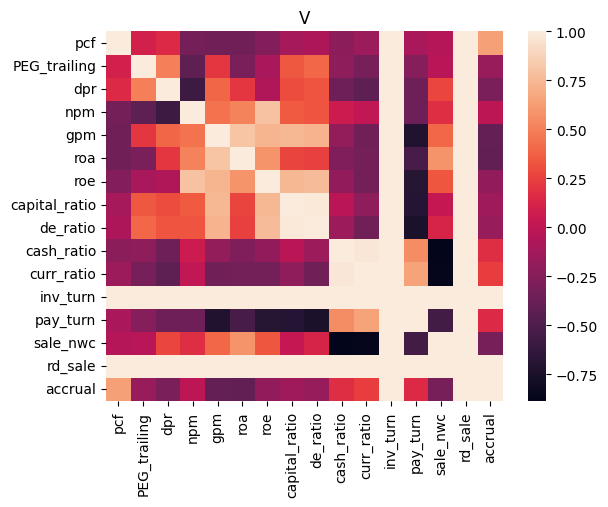

In [14]:
freq = 'Daily'

for name in stock_list:
    FundaInd = pd.read_csv('ForwardFundaIndicators/'+freq+'/'+name+'.csv')
    sns.heatmap(FundaInd.corr().fillna(1))
    plt.title(name)
    plt.show()

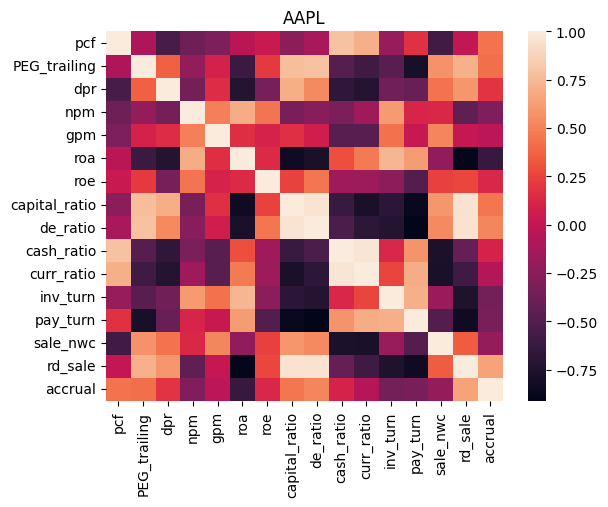

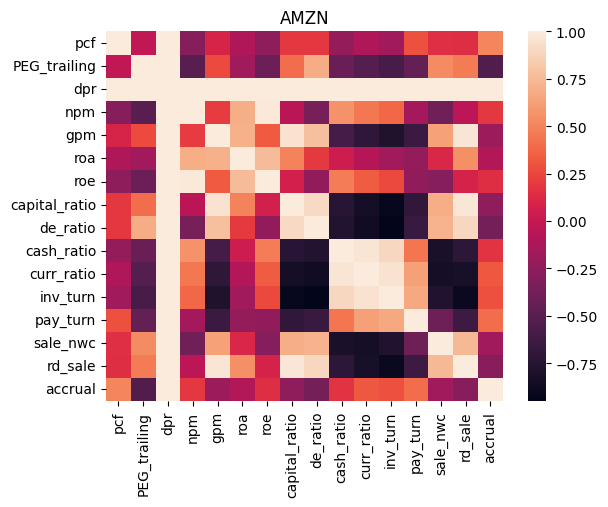

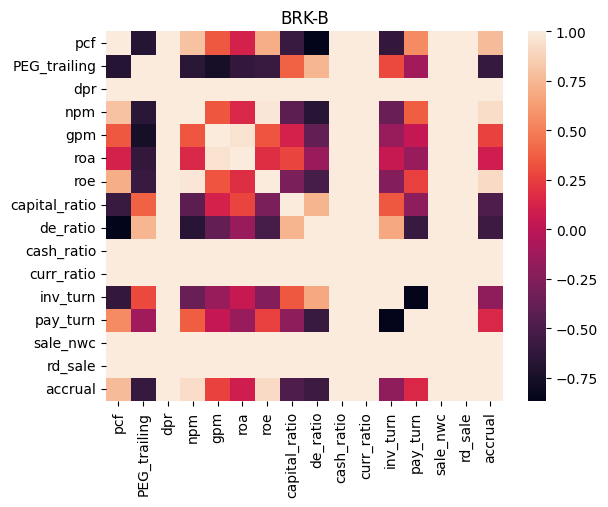

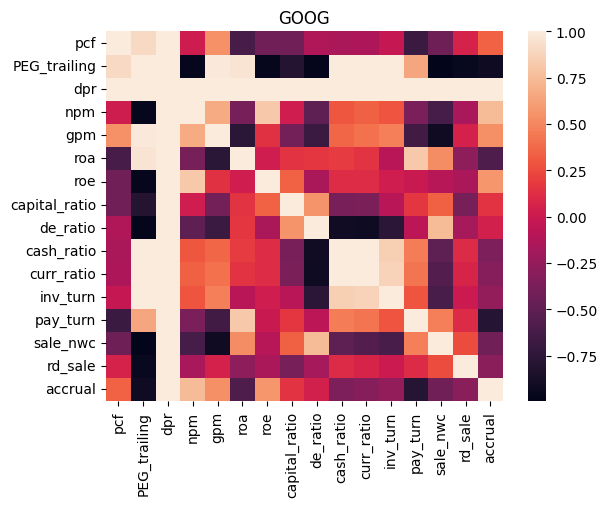

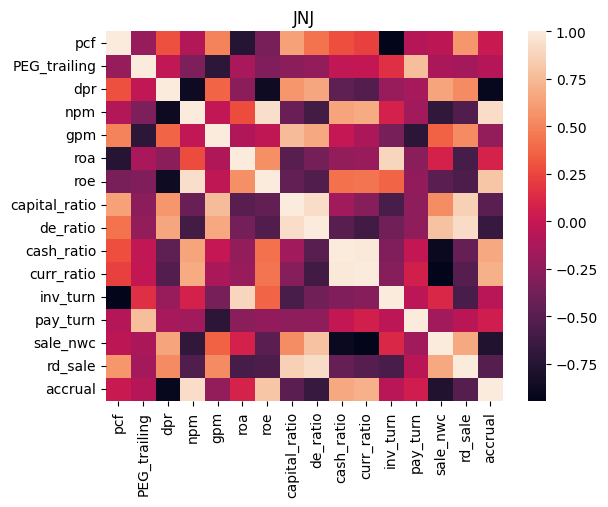

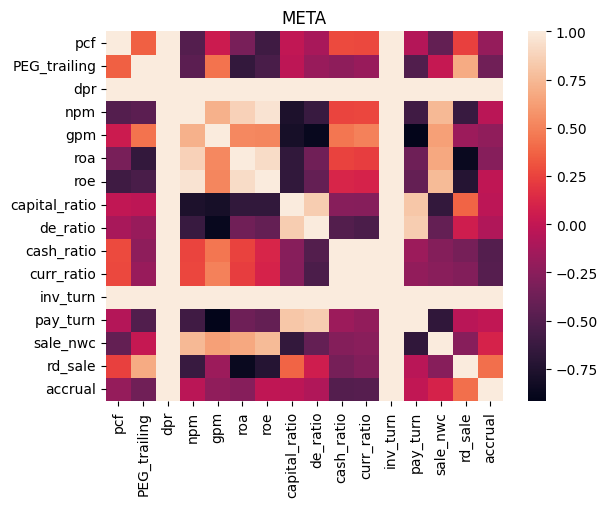

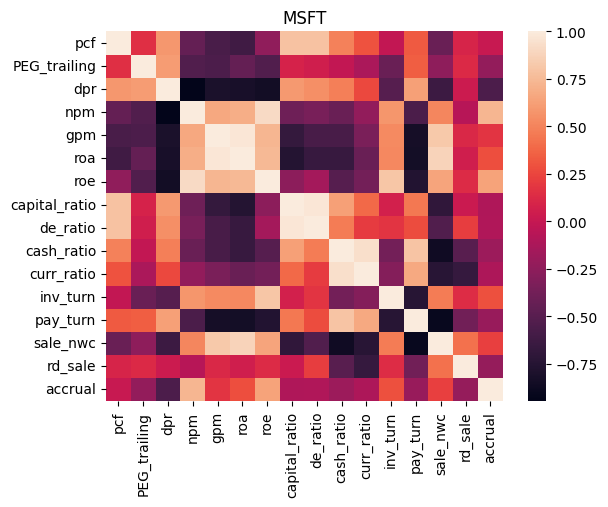

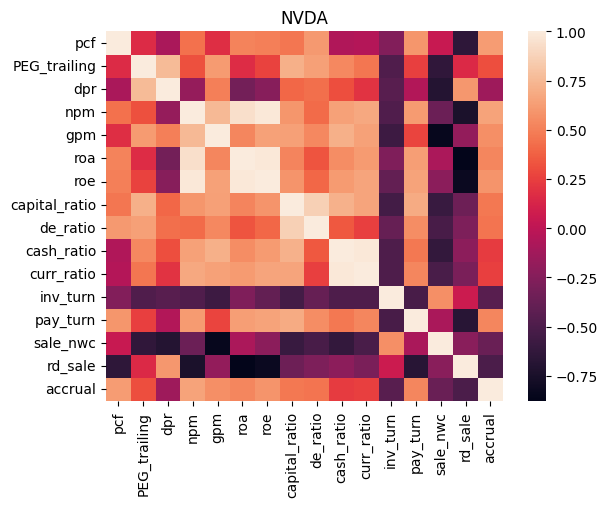

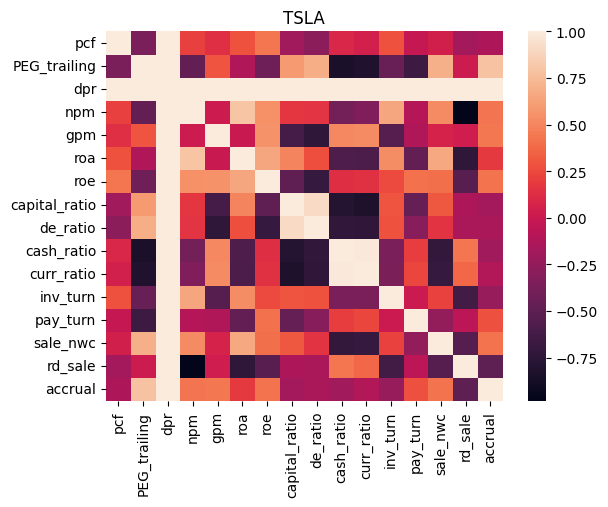

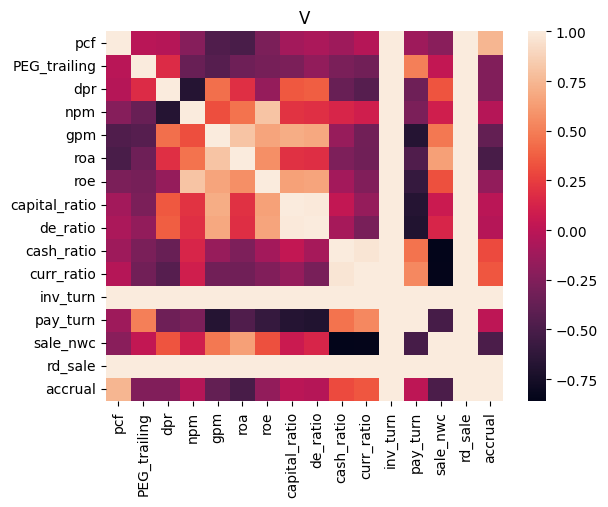

In [15]:
freq = 'Weekly'

for name in stock_list:
    FundaInd = pd.read_csv('ForwardFundaIndicators/'+freq+'/'+name+'.csv')
    sns.heatmap(FundaInd.corr().fillna(1))
    plt.title(name)
    plt.show()

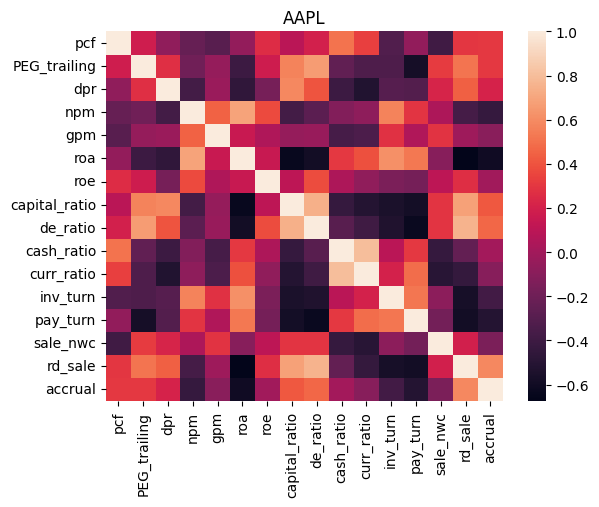

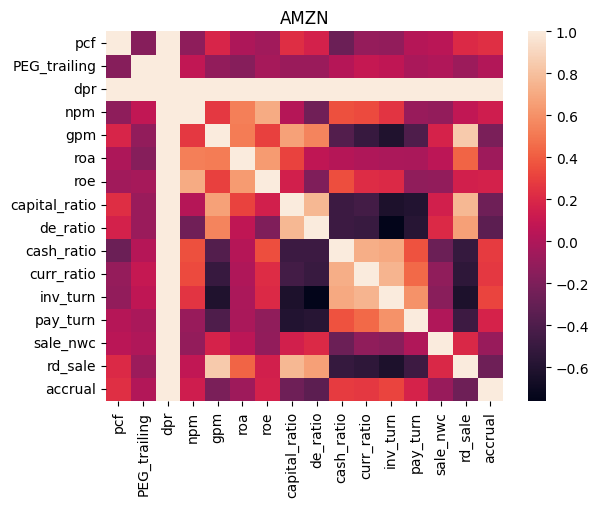

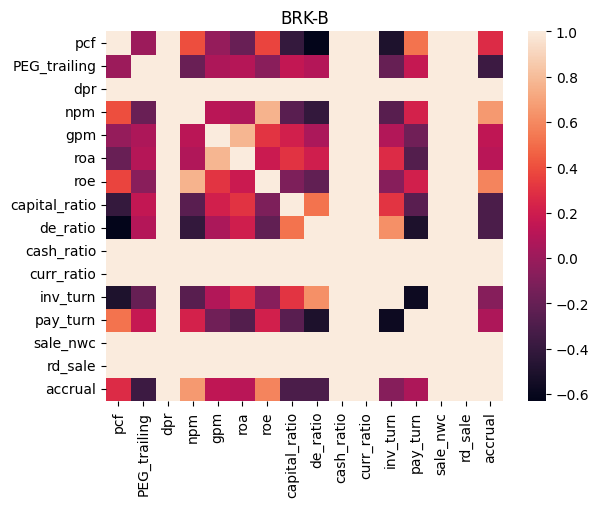

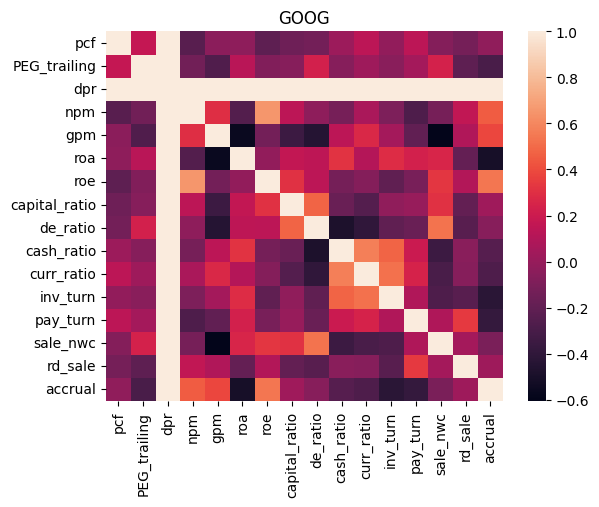

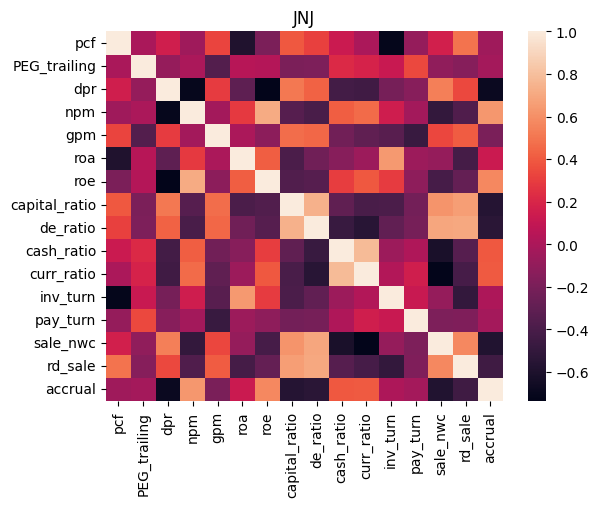

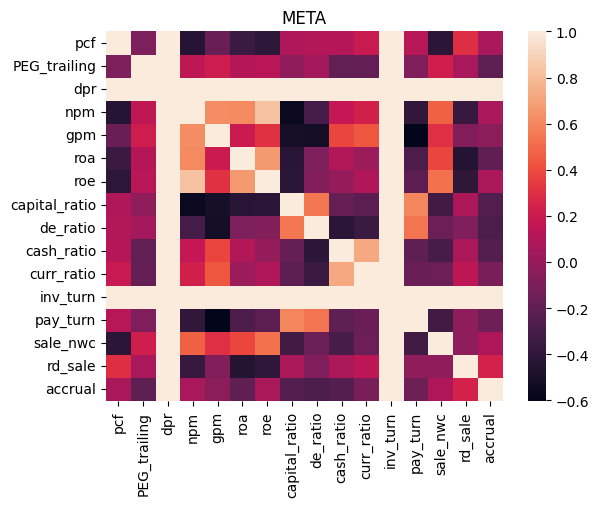

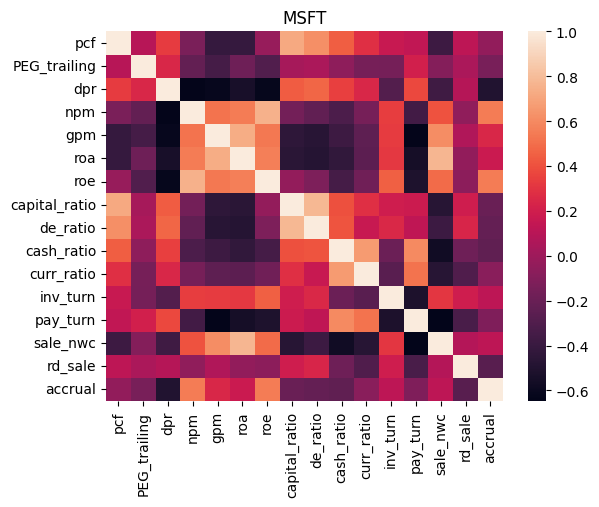

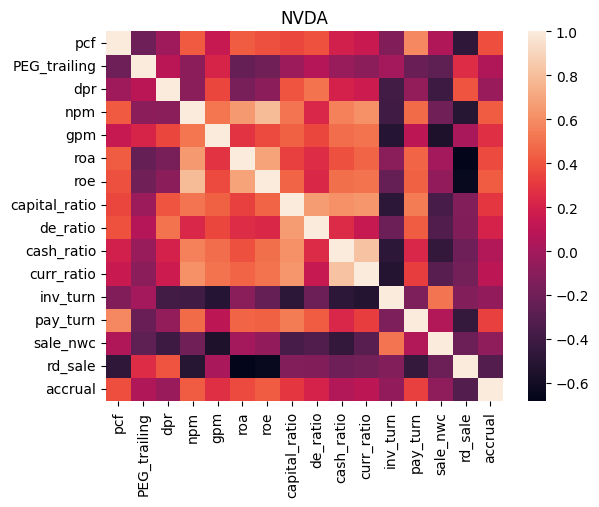

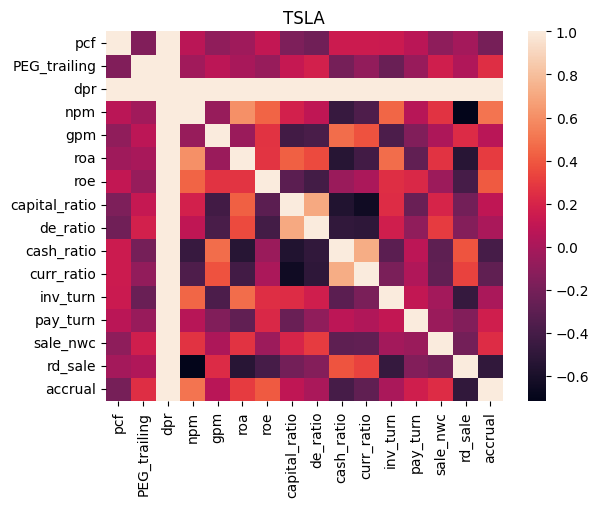

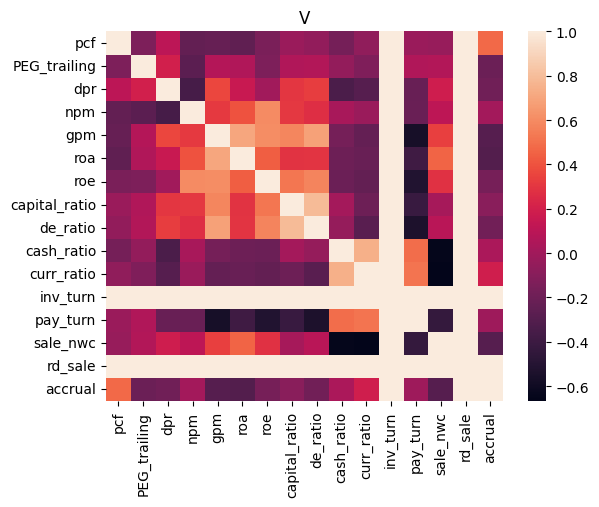

In [16]:
freq = 'Monthly'

for name in stock_list:
    FundaInd = pd.read_csv('FundaIndicators/'+freq+'/'+name+'.csv')
    sns.heatmap(FundaInd.corr().fillna(1))
    plt.title(name)
    plt.show()

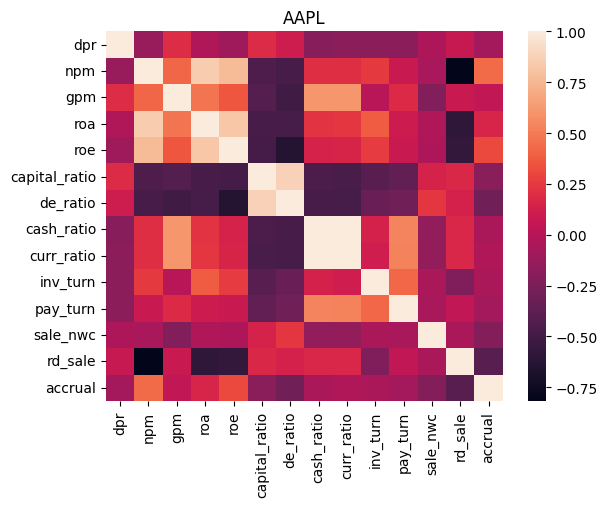

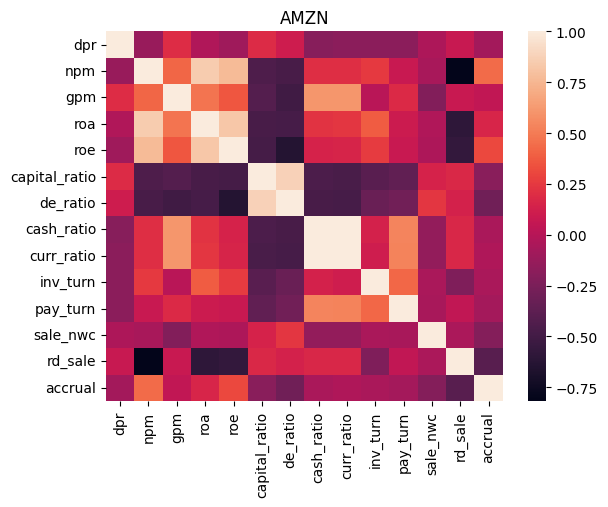

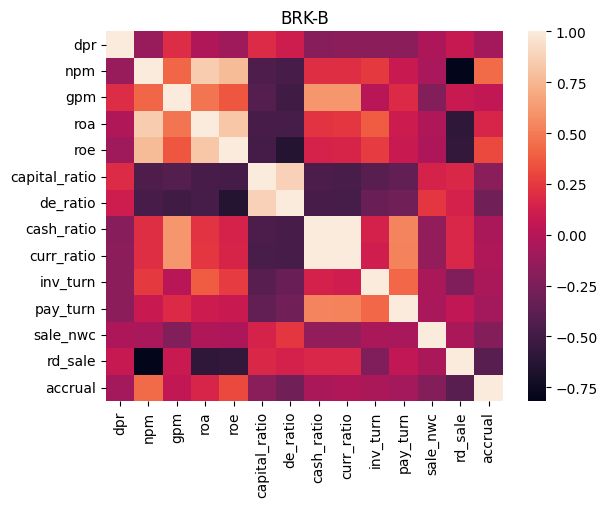

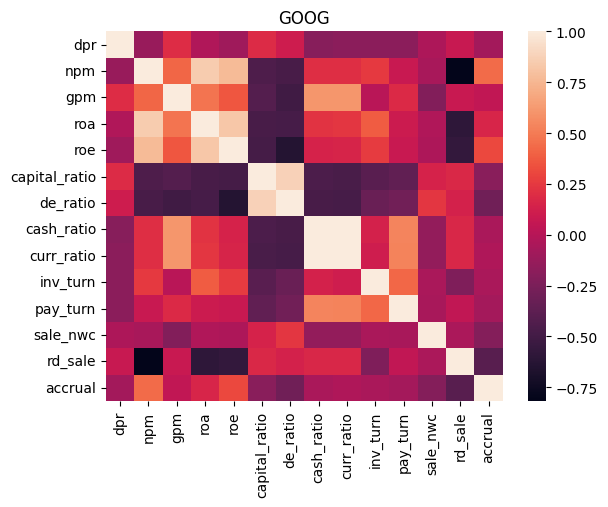

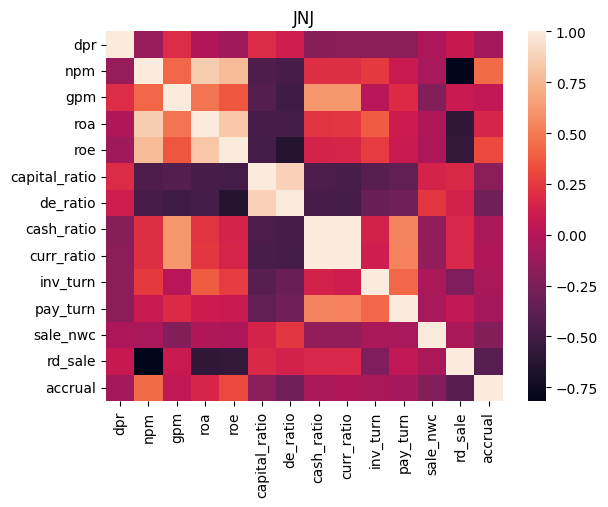

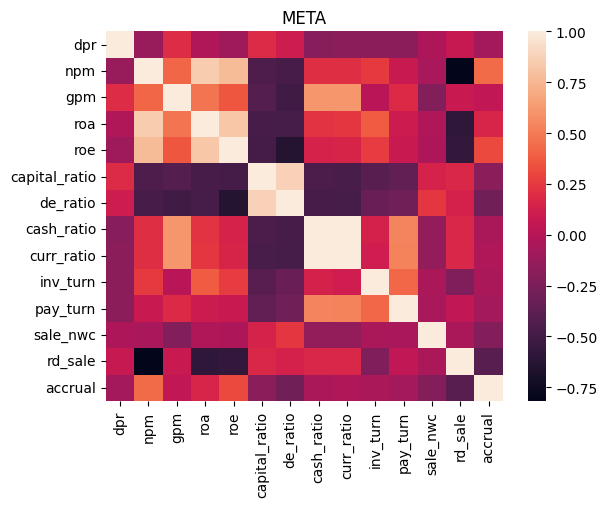

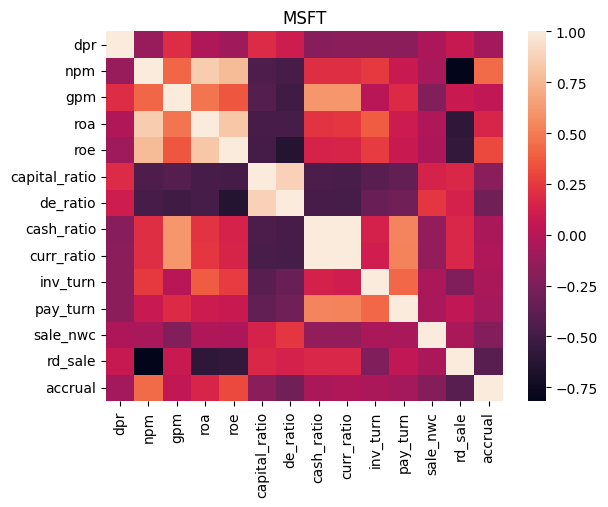

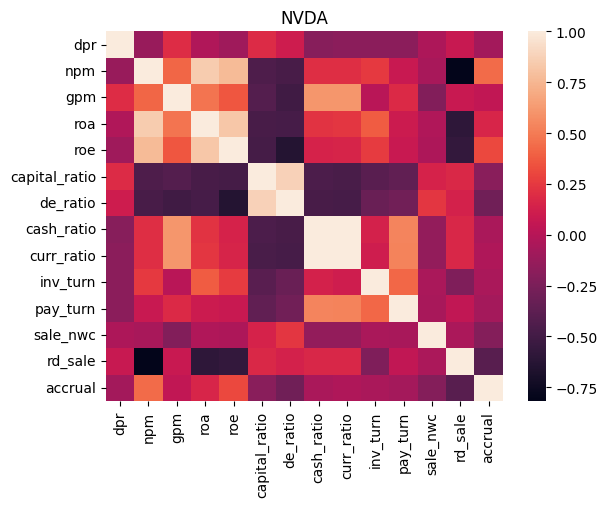

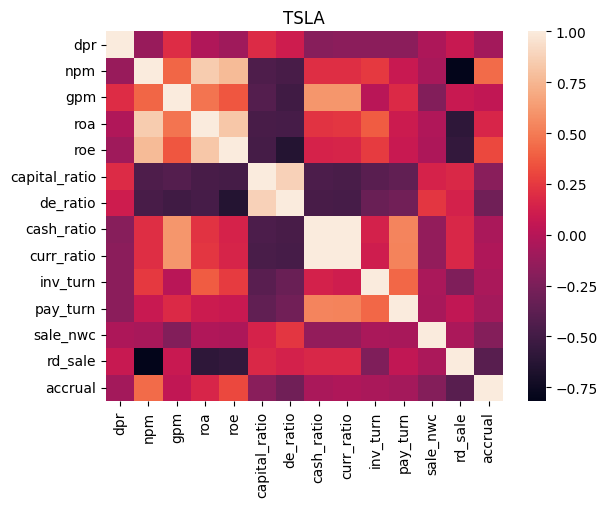

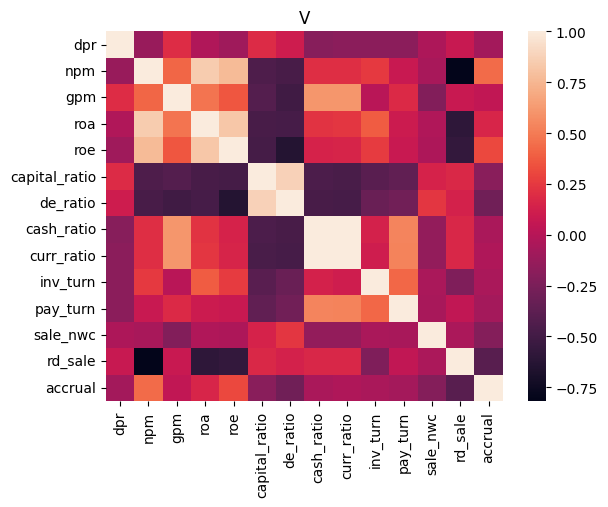

In [17]:
for s in stock_list:
    funda_stock = funda_data.loc[funda_data.TICKER == s,:]
    funda_stock['public_date'] = funda_data.public_date.apply(lambda x:dt.datetime.strptime(x,'%m/%d/%Y'))
    funda_stock.set_index('public_date')
    sns.heatmap(funda_data.corr().fillna(0))
    plt.title(s)
    plt.show()